# Sesión 1. Operaciones básicas sobre imágenes

In [1]:
#Primero iniciamos los paquetes que necesitamos para manejar las distintas funciones
import numpy as np
from matplotlib import pyplot as plt
import cv2
#tamaños de las imágenes
plt.rcParams["figure.figsize"] = [14,8]

## Lectura de imágenes

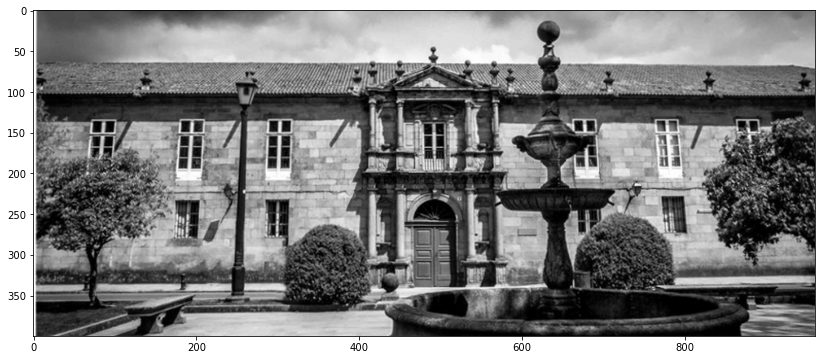

True

In [2]:
# Lee una imagen en escala de grises, por eso ponemos GRAYSCALE, sino por defecto la lee en color
imagenGrises = cv2.imread('imaxes/IESRosaliadeCastro.jpg',cv2.IMREAD_GRAYSCALE)

#Muestra la imagen por pantalla, tenemos que decirle que la visualice en escala de grises
plt.imshow(imagenGrises,cmap='gray')
#Muestra las imágenes de plt.imshow
plt.show()

#Guardamos en disco la imagen en escala de grises
cv2.imwrite('imaxes/IESRosaliadeCastroGrises.jpg',imagenGrises)

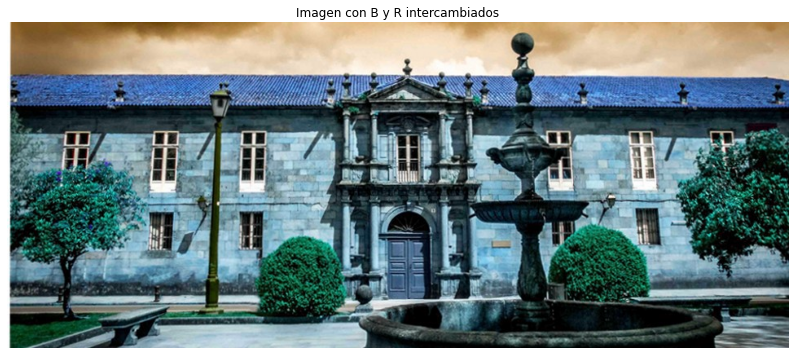

In [3]:
# Lee una imagen en color, el segundo parámetro es el valor por defecto, no es necesario
#imagen = cv2.imread('IESMariaCasares.jpg',cv2.IMREAD_COLOR)
imagen = cv2.imread('imaxes/IESRosaliadeCastro.jpg')

#Muestra la imagen. Las imágenes en OpenCV se leen como BGR, no como RGB, por lo que está intercambiando el rojo
#con el azul, lo que se ve muy bien en la señal de tráfico.
#Esto no pasa con todas las imágenes, por eso siempre hay que comprobarlas
plt.imshow(imagen),plt.title('Imagen con B y R intercambiados'),plt.axis('off')
plt.show()


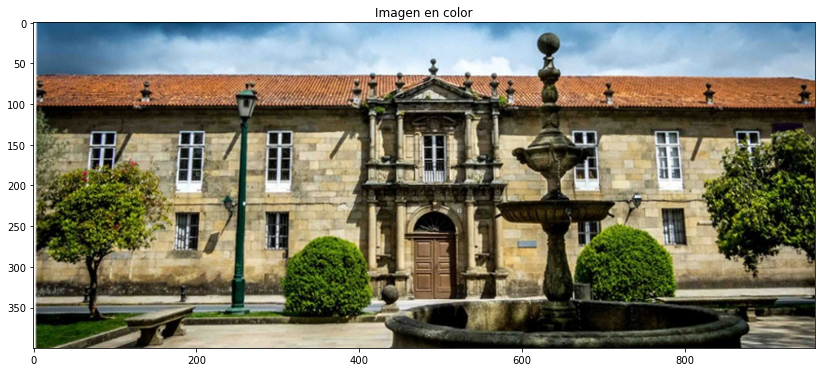

True

In [4]:
#Separamos la imagen original en los tres canales en el orden adecuado: b=blue, g=green, r=red
b,g,r = cv2.split(imagen)

#Y volvemos a fusionar los tres canales en el orden que queremos
imagenColor = cv2.merge((r,g,b)) 

#Muestro la imagen resultante, ahora sale bien
plt.imshow(imagenColor),plt.title('Imagen en color'),plt.axis('on')
plt.show()
cv2.imwrite('imaxes/IESRosaliadeCastroBGR.jpg',imagenColor)

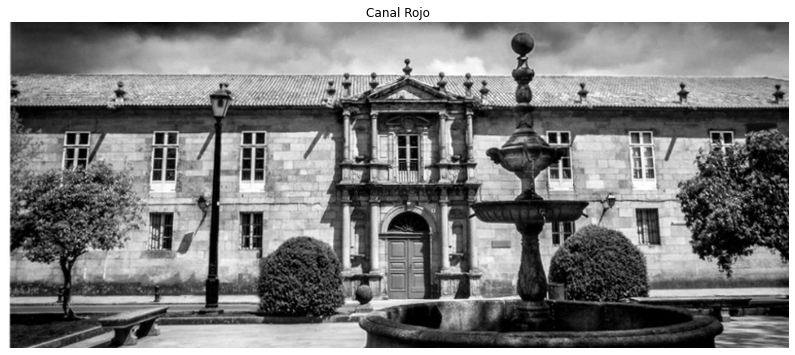

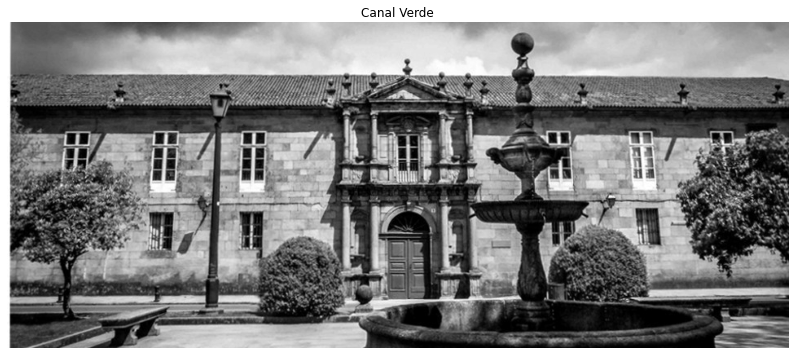

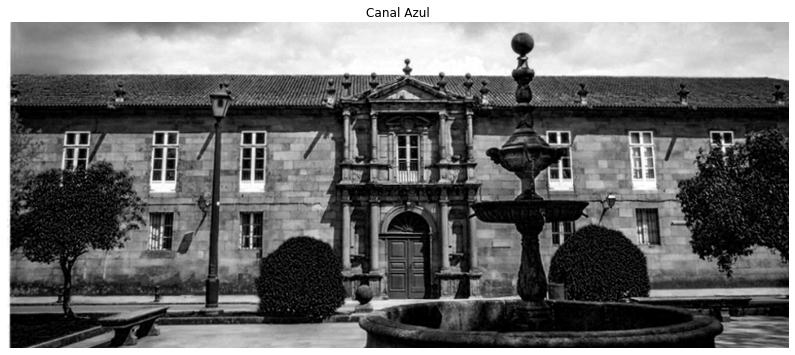

In [5]:
#Vamos a separar la imagen en sus tres canales y a discutir cuál contribuye más a cada "color final", 
#teniendo en cuenta que cuango más brillante, más va a contribuir (fijaos en el borde rojo de la señal de tráfico
#o en la hierba)
plt.imshow(r,cmap='gray'),plt.title('Canal Rojo'),plt.axis('off')
plt.show()
plt.imshow(g,cmap='gray'),plt.title('Canal Verde'),plt.axis('off')
plt.show()
plt.imshow(b,cmap='gray'),plt.title('Canal Azul'),plt.axis('off')
plt.show()

In [6]:
#Propiedades de la imagen: número de filas, número de columnas, número de canales (si la imagen es en color)
print(imagenColor.shape)
print(imagenGrises.shape)

(400, 960, 3)
(400, 960)


In [7]:
#También podemos saber el número total de píxeles
print(imagenColor.size)
#Y el tipo de datos de la imagen. uint8 significa que es un entero de 8 bits (2^8=256), o sea que los valores
#posibles están entre 0 y 255 
print(imagenColor.dtype)

1152000
uint8


In [8]:
#Cómo acceder al valor de un píxel mediante sus coordenadas. Para una imagen BGR, devuelve un vector de 3 valores.
#En este caso, si tomamos un punto en la zona del tejado, podemos fijarnos que la componente R es muy alta
flor=imagenColor[185,63] #en matlab [64,186]=154,18,58
print('flor=',flor)

#y si lo tomamos en la zona verde, el valor de G es más alto que B y R
seto=imagenColor[275,350] #en matlab [351,276]=83,113,39
print('seto=',seto)
#si quiero sólo el canal verde, teniendo en cuenta que la imagen es BGR
setoGreen=imagenColor[275,350,1]
print('componente G de seto=',setoGreen)
#para una imagen en grises, se obtiene sólo un valor
florgris=imagenGrises[185,63]
print('Color gris de flor=',florgris)

flor= [154  18  58]
seto= [ 83 113  39]
componente G de seto= 113
Color gris de flor= 63


In [9]:
#Del mismo modo, se puede acceder a la imagen para modificar sus valores
imagenColor[185,63]=[255,255,255]
print(imagenColor[185,63])


[255 255 255]


In [10]:
#Normalmente se utilizan otras funciones para hacer estas operaciones, que son array.item() y array.itemset()

#acceso a valor BLUE (canal 2)
print(imagenColor.item(10,10,2))

#modificación del valor BLUE
imagenColor.itemset((10,10,2),100)
imagenColor.item(10,10,2)

143


100

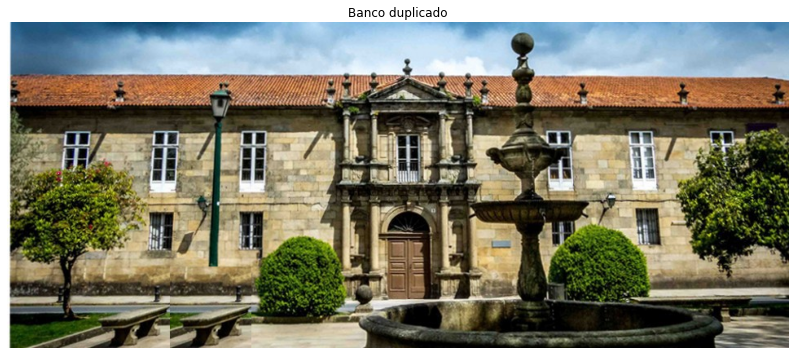

In [11]:
#ROI (region of interest). Muchas veces necesitamos extraer un trozo de la imagen o modificarla.
#Podemos acceder a un "recuadro" de las coordenadas indicando coordenadaxinicial:coordenadaxfinal y lo mismo para el eje y
#Por ejemplo, si queremos extraer el banco
#Se extrae un cuadrado de tamaño 100x100 que va de la fila 300 a la 400 (eje y) y de la columna 100 a la columna 200 (eje x)
banco=imagenColor[300:400,100:200]

#100,300 a 200, 400

#Podemos colocar esta imagen duplicada en otro sitio, por ejemplo en la fila 350, columna 950
imagenColor[300:400,200:300]=banco
plt.imshow(imagenColor),plt.title('Banco duplicado')
plt.show()

### Cambiar el espacio de color

Existen muchos métodos de conversión de los espacios de color, pero sólo veremos el cambio de color (BGR) a grises. Para eso usamos la función `cv2.cvtColor(input_image,flag)`, donde `flag` determina el tipo de conversión.
Para convertir una imagen en color a grises, flag toma el valor `cv2.COLOR_BGR2GRAY`

Estas funciones utilizan la siguiente fórmula: `G=0.2125 R + 0.7154 G + 0.0721 B`, que es la que mejor representa la percepción humana de los colores RGB que suman 1.

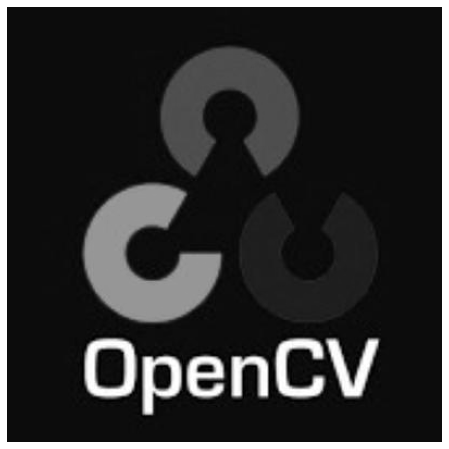

In [12]:
imagenLogo = cv2.imread('imaxes/opencv-logo.jpg')
imagenGrises=cv2.cvtColor(imagenLogo,cv2.COLOR_BGR2GRAY)
plt.imshow(imagenGrises,cmap='gray'),plt.axis('off')
plt.show()